# TP4 - kPCA

TD : trouver les formules du cours à partir de la formulatiyoACP kernelisée

## Preliminaries

This section builds up some preliminary analysis to get some unerstanding on how PCA works.
Let us consider the following data blob:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
n_samples = 100

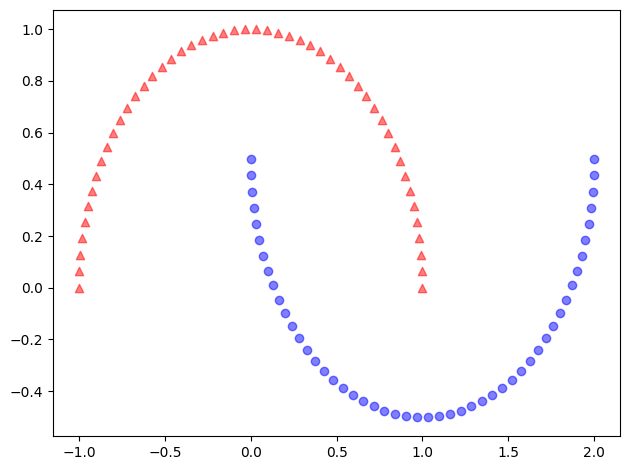

In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=n_samples, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

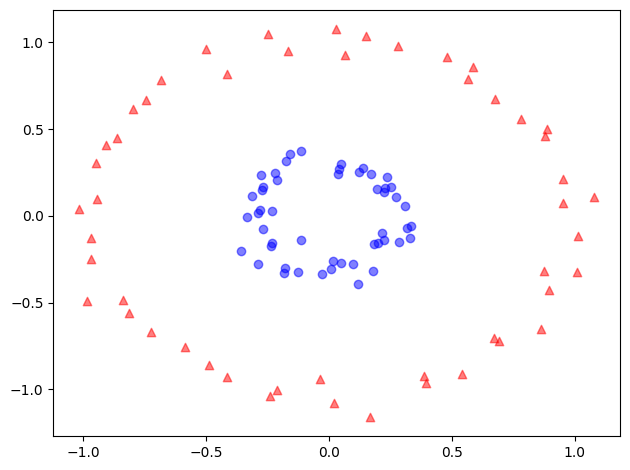

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=n_samples, factor=0.3, noise=0.05, random_state=0)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()


## kPCA - algorithm


In [9]:
from sklearn.gaussian_process.kernels import RBF

In [10]:
rbf = RBF()

In [11]:
type(rbf)

sklearn.gaussian_process.kernels.RBF

In [12]:
kernel = RBF()
print(kernel(X[0].reshape(1, -1),X[1].reshape(1, -1)))
#print(kernel(X))
print(kernel(X).shape)
n_components = 2

[[0.60793165]]
(100, 100)


In [13]:
X

array([[-0.97084503, -0.12673179],
       [ 0.0175851 , -0.26234717],
       [ 0.95036645,  0.21475102],
       [ 0.22502371,  0.1392982 ],
       [-0.33375109, -0.00663921],
       [ 0.22221725, -0.14159555],
       [-0.41722927,  0.81854348],
       [-0.28254202,  0.0316577 ],
       [ 0.25257096,  0.16894743],
       [ 0.20078855, -0.15727739],
       [ 0.22938778,  0.16133137],
       [ 0.17782741, -0.31584269],
       [-0.23267041, -0.15567667],
       [ 0.02939406,  1.07430209],
       [ 0.56514721,  0.78937127],
       [-0.81254486, -0.55757727],
       [-0.90616904,  0.40912042],
       [-0.94673872,  0.09604209],
       [-0.48894885, -0.85705833],
       [ 0.58450673,  0.85469206],
       [ 0.69240609, -0.72351839],
       [ 0.04915661,  0.29949606],
       [ 0.88026848,  0.46174426],
       [-0.27494568,  0.14719335],
       [ 0.86055779, -0.6516347 ],
       [ 1.01046915, -0.32319546],
       [ 0.67545788,  0.67409068],
       [ 0.32786302, -0.12475288],
       [-0.11501586,

In [14]:
np.shape(X)[0]

100

In [15]:
class My_kernel_PCA:
    def __init__(self, n_components, kernel):
        self.n_components = n_components
        self.kernel = RBF()

    def fit(self, X):

     self.X = X

    def fit_transform(self, X):
      n = np.shape(X)[0]
      print(n)
      id = np.full([n,n], 1/n)
      k = self.kernel(X) - 2*id @ self.kernel(X) + id@self.kernel(X)@id
      new_x = np.zeros_like(X)
      eigen_values, eigen_vectors = np.linalg.eigh(k)
      idx = eigen_values.argsort()[::-1]
      eigen_values = eigen_values[idx]
      eigen_vectors = eigen_vectors[:,idx]
      print(eigen_values)
      print(eigen_vectors)

      for l in range(n):
        for j in range(self.n_components):
          for i in range(n):
            new_x[i,j] += eigen_vectors[i,j]*kernel(X[l].reshape(1, -1),X[i].reshape(1, -1))
      return(new_x)
          #new_x[i,j] = sum(eigen_vectors[i,j]*eigen_values[l]
     # for j in range(self.n_components):
      #  for i in range(n):
       #   new_x[j][] += eigen_vectors[i,j]*k[i,j]
      return(new_x)


In [16]:
from sklearn.decomposition import KernelPCA

In [17]:
kernel= RBF()  # ‘rbf’, ‘sigmoid’, ‘polynomial’, ‘poly’, ‘linear’, ‘cosine’

my_manifold_learning = My_kernel_PCA(n_components=2, kernel=kernel)
data_transformed = my_manifold_learning.fit_transform(X=X)

100
[ 1.29063130e+01  1.24042006e+01  1.00764981e+01  6.94807194e+00
  3.15839880e+00  2.73033354e+00  2.55142033e+00  1.96394147e+00
  1.47888761e+00  1.14153203e+00  1.04005256e+00  8.86006965e-01
  7.87241328e-01  6.08642121e-01  5.97668990e-01  5.67173485e-01
  4.79830500e-01  4.60776327e-01  4.48160004e-01  4.07566403e-01
  3.91496767e-01  3.66590256e-01  3.25779516e-01  2.83359271e-01
  2.45727107e-01  2.40675511e-01  1.88502912e-01  1.31040776e-01
  1.16228340e-01  8.20357672e-02  7.84659063e-02  6.36605273e-02
  5.83618512e-02  5.24787022e-02  3.85034400e-02  3.00497336e-02
  2.84994371e-02  2.08715748e-02  2.04070825e-02  1.68301659e-02
  1.39993430e-02  1.33470188e-02  1.30495336e-02  1.27729087e-02
  1.07771603e-02  8.79315214e-03  6.17432451e-03  5.76689782e-03
  5.36745048e-03  3.90908411e-03  2.39818051e-03  1.41560506e-03
  4.17471506e-04 -1.58755764e-03 -2.49152623e-03 -3.59527048e-03
 -4.03719129e-03 -5.28476647e-03 -6.60802069e-03 -9.59773861e-03
 -1.02305691e-02 -1.1

C:\Users\bausm\AppData\Local\Temp\ipykernel_1812\2677564704.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_x[i,j] += eigen_vectors[i,j]*kernel(X[l].reshape(1, -1),X[i].reshape(1, -1))


In [18]:
X

array([[-0.97084503, -0.12673179],
       [ 0.0175851 , -0.26234717],
       [ 0.95036645,  0.21475102],
       [ 0.22502371,  0.1392982 ],
       [-0.33375109, -0.00663921],
       [ 0.22221725, -0.14159555],
       [-0.41722927,  0.81854348],
       [-0.28254202,  0.0316577 ],
       [ 0.25257096,  0.16894743],
       [ 0.20078855, -0.15727739],
       [ 0.22938778,  0.16133137],
       [ 0.17782741, -0.31584269],
       [-0.23267041, -0.15567667],
       [ 0.02939406,  1.07430209],
       [ 0.56514721,  0.78937127],
       [-0.81254486, -0.55757727],
       [-0.90616904,  0.40912042],
       [-0.94673872,  0.09604209],
       [-0.48894885, -0.85705833],
       [ 0.58450673,  0.85469206],
       [ 0.69240609, -0.72351839],
       [ 0.04915661,  0.29949606],
       [ 0.88026848,  0.46174426],
       [-0.27494568,  0.14719335],
       [ 0.86055779, -0.6516347 ],
       [ 1.01046915, -0.32319546],
       [ 0.67545788,  0.67409068],
       [ 0.32786302, -0.12475288],
       [-0.11501586,

In [19]:
data_transformed

array([[ -1.51388066,  -9.2205755 ],
       [ -3.25476684,   1.2172247 ],
       [  4.01793556,   8.96209883],
       [  4.94645506,   4.56885082],
       [  0.85380883,  -5.7579139 ],
       [ -0.29521589,   5.30582579],
       [  8.41464479,  -5.82725623],
       [  2.05051905,  -5.24419147],
       [  5.78358543,   4.67314305],
       [ -0.28597694,   4.70621567],
       [  5.66677951,   4.29968406],
       [ -3.26512048,   4.41429396],
       [ -1.29459873,  -3.74407184],
       [  8.72265543,  -1.48666488],
       [  8.59764309,   4.09243652],
       [ -5.5810476 ,  -7.37826815],
       [  3.09302539,  -9.52022783],
       [  0.39641957, -10.07332062],
       [ -8.0947513 ,  -3.84888032],
       [  8.21580151,   3.81099825],
       [ -5.35065027,   7.20036497],
       [  8.26701459,  -0.38433835],
       [  5.51451525,   7.41714818],
       [  4.97940632,  -5.77592049],
       [ -4.46588623,   7.75963795],
       [ -1.63711746,   8.8681015 ],
       [  7.57807414,   5.80989774],
 

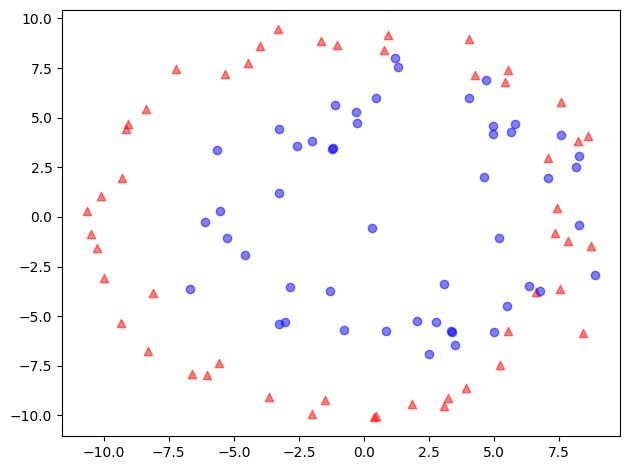

In [20]:
plt.scatter(data_transformed[y==0, 0], data_transformed[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(data_transformed[y==1, 0], data_transformed[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

100
[ 2.41152152e+01  1.28484595e+01  9.14006788e+00  5.01474935e+00
  3.00279310e+00  2.28183964e+00  1.70391558e+00  1.41622845e+00
  1.24266000e+00  1.14356843e+00  7.13872857e-01  6.54478703e-01
  6.22384378e-01  5.78736180e-01  4.93633857e-01  4.54606218e-01
  4.12929331e-01  3.65893333e-01  3.44803293e-01  3.34416177e-01
  3.20138909e-01  2.86231077e-01  2.52310510e-01  2.26210156e-01
  2.10548721e-01  1.83224260e-01  1.73364013e-01  1.68698438e-01
  1.52071120e-01  1.39047811e-01  1.27956779e-01  1.23652071e-01
  1.11964340e-01  1.07963062e-01  9.95833922e-02  8.14169795e-02
  7.82072993e-02  7.36098991e-02  6.88300152e-02  6.10530429e-02
  6.05802161e-02  5.61183254e-02  4.29303668e-02  3.92828954e-02
  3.17110519e-02  2.55122216e-02  2.07240820e-02  1.60651793e-02
  1.48756242e-02  1.10079097e-02  7.10533638e-03  6.37615044e-03
  5.08148198e-03 -3.74064497e-03 -4.84582491e-03 -7.51507911e-03
 -1.00763788e-02 -1.55332870e-02 -1.85727789e-02 -2.29739016e-02
 -2.66935910e-02 -2.8

C:\Users\bausm\AppData\Local\Temp\ipykernel_1812\2677564704.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_x[i,j] += eigen_vectors[i,j]*kernel(X[l].reshape(1, -1),X[i].reshape(1, -1))


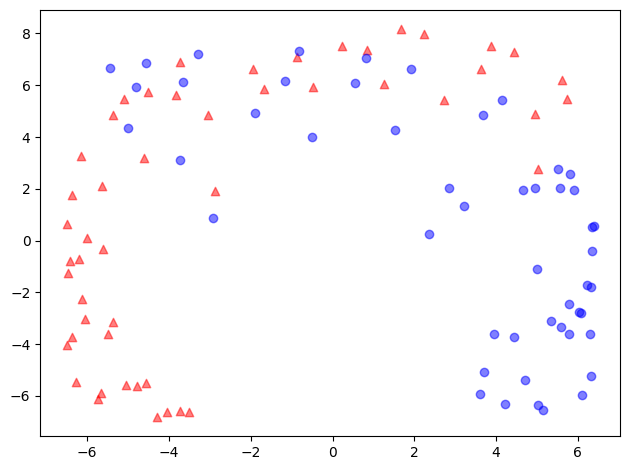

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=n_samples, random_state=123)
data_transformed = my_manifold_learning.fit_transform(X=X)
plt.scatter(data_transformed[y==0, 0], data_transformed[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(data_transformed[y==1, 0], data_transformed[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

In [22]:
my_manifold_learning.S

AttributeError: 'My_kernel_PCA' object has no attribute 'S'

In [ ]:
print (data_transformed.shape)
data_transformed[:10]

(2, 2)


array([[ 0.74177556, -0.74177556],
       [ 0.        ,  0.        ]])

In [ ]:
X[:10]

array([[-0.97084503, -0.12673179],
       [ 0.0175851 , -0.26234717],
       [ 0.95036645,  0.21475102],
       [ 0.22502371,  0.1392982 ],
       [-0.33375109, -0.00663921],
       [ 0.22221725, -0.14159555],
       [-0.41722927,  0.81854348],
       [-0.28254202,  0.0316577 ],
       [ 0.25257096,  0.16894743],
       [ 0.20078855, -0.15727739]])

In [ ]:
plt.scatter(data_transformed[y==0, 0], data_transformed[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(data_transformed[y==1, 0], data_transformed[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 100

# test

In [ ]:
from scipy.spatial.distance import pdist, squareform
from numpy import random
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    X_pc = np.column_stack([eigvecs[:, i]
                           for i in range(n_components)])
    return X_pc


ImportError: cannot import name 'exp' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

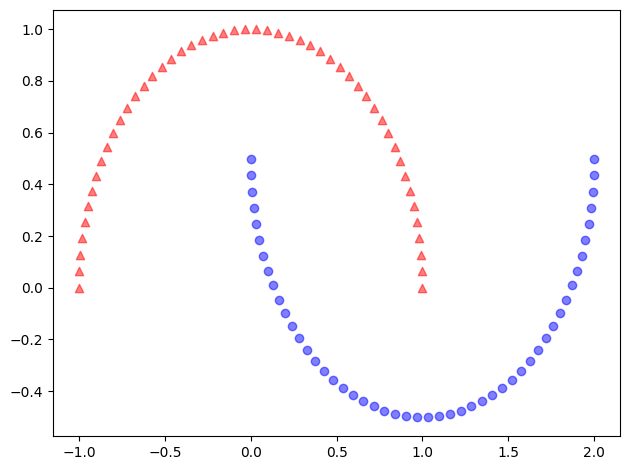

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

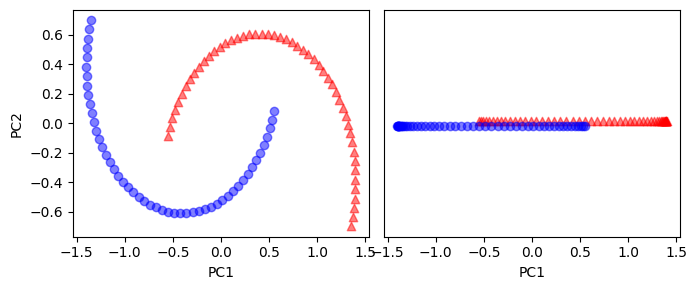

In [ ]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

<ipython-input-6-2d6bf340b459>:8: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)


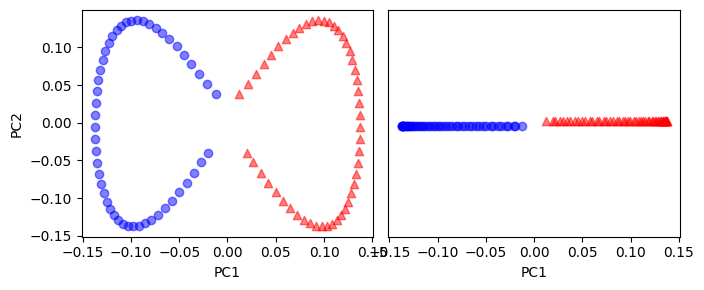

In [ ]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()



# Comparaison avec sklearn kPCA

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=5, fit_inverse_transform=True, alpha=0.1)
X_kernel_pca = kernel_pca.fit(X).transform(X)

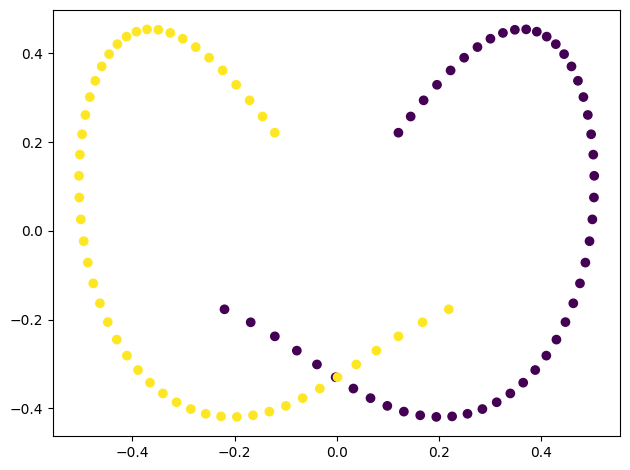

In [ ]:
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c= y)
plt.tight_layout()
plt.show()

# Kernel Matrix from Scratch

In this exercice, your goal is to construct the kernel matrix by yourself instead of using one of sklearn one. Here we will implement the RBF kernel.
RBF Kernel is a widely used kernel in machine learning. This kernel is also special, the feature is space is infinite dimensional. You can find its projection operator here https://en.wikipedia.org/wiki/Radial_basis_function_kernel

This space is an RKHS, so we can directly express the dot product of the projection of two vector in this feature space, without even doing the projection. The kernel of this RKHS is given by:
$K(x,y) = \exp\left(-\gamma \sum_{d=1}^D (x_d - y_d)^2\right)$ with $\gamma = \frac{1}{2\sigma^2}$

$\sigma$ is called the bandwith and is an hyperparameter.

Based on your previous implementation, implement from scratch the RBF Kernel PCA without ever using any scikit learn function. You'll validate your approach by comparing your result with those of scikit learn. You'll apply this to MNIST and project it in two and three dimension, color the point by their class. What do you observe ?  was it what you expected ? Comment your result

Custom RBF Kernel PCA shape: (1000, 2)
Sklearn RBF Kernel PCA shape: (1000, 2)


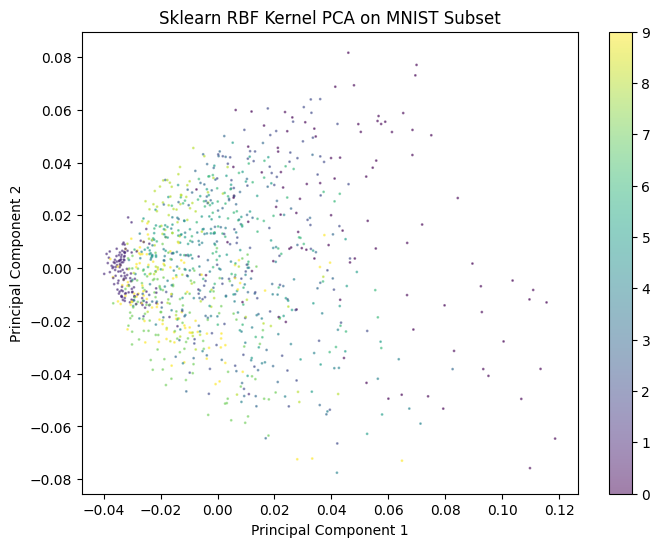

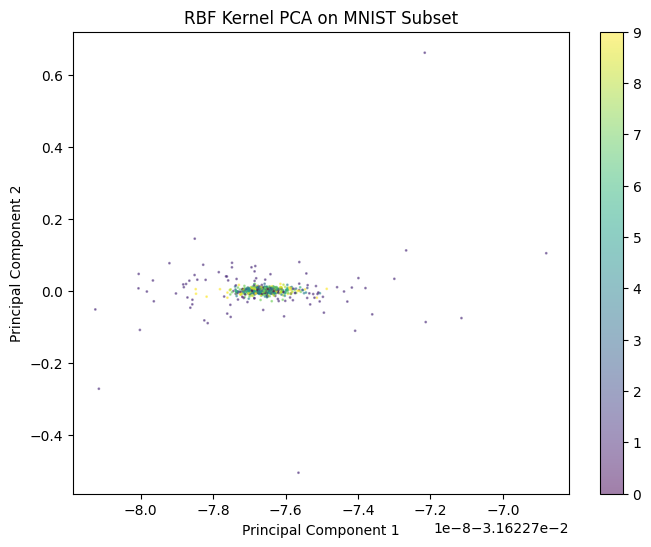

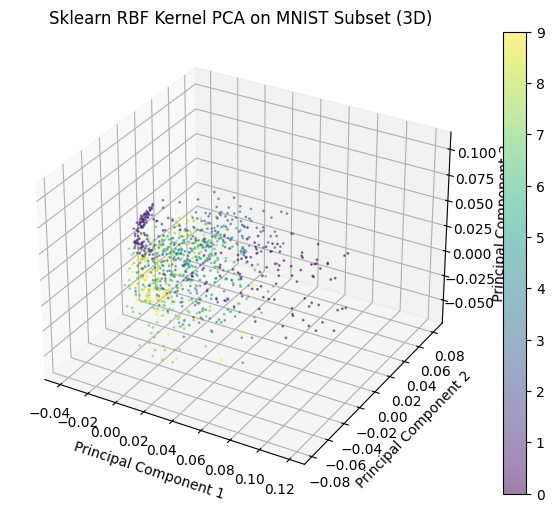

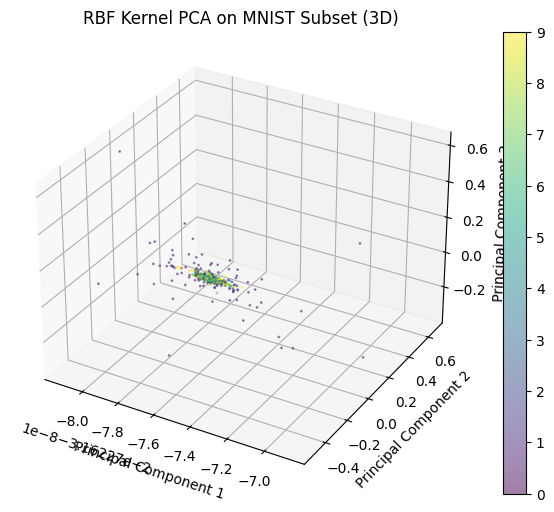

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from sklearn.datasets import fetch_openml
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF Kernel PCA implementation from scratch.
    
    Parameters:
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    gamma: float, Tuning parameter of the RBF kernel
    n_components: int, Number of principal components to return
    
    Returns:
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
    """
 
    sq_dists = pdist(X, 'sqeuclidean')
    
   
    mat_sq_dists = squareform(sq_dists)
    
    
    K = np.exp(-gamma * mat_sq_dists)
    
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
  
    eigvals, eigvecs = eigh(K)
    

    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    
    return X_pc


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.int64)


subset_size = 1000
X_subset = X[:subset_size]
y_subset = y[:subset_size]

# On ne prend pas tout msit (ensemple trop gros)
epsilon = 1e-10
X_subset = (X_subset - X_subset.mean(axis=0)) / (X_subset.std(axis=0) + epsilon)


gamma = 0.00001
n_components = 2
X_kpca = rbf_kernel_pca(X_subset, gamma=gamma, n_components=n_components)


sklearn_kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=gamma)
X_sklearn_kpca = sklearn_kpca.fit_transform(X_subset)

# Print shapes of the transformed data
print("Custom RBF Kernel PCA shape:", X_kpca.shape)
print("Sklearn RBF Kernel PCA shape:", X_sklearn_kpca.shape)

# 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_sklearn_kpca[:, 0], X_sklearn_kpca[:, 1], c=y_subset, cmap='viridis', s=1, alpha=0.5)
plt.colorbar()
plt.title('Sklearn RBF Kernel PCA on MNIST Subset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_subset, cmap='viridis', s=1, alpha=0.5)
plt.colorbar()
plt.title('RBF Kernel PCA on MNIST Subset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# 3D
n_components_3d = 3
X_kpca_3d = rbf_kernel_pca(X_subset, gamma=gamma, n_components=n_components_3d)


sklearn_kpca_3d = KernelPCA(n_components=n_components_3d, kernel='rbf', gamma=gamma)
X_sklearn_kpca_3d = sklearn_kpca_3d.fit_transform(X_subset)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_sklearn_kpca_3d[:, 0], X_sklearn_kpca_3d[:, 1], X_sklearn_kpca_3d[:, 2], c=y_subset, cmap='viridis', s=1, alpha=0.5)
plt.colorbar(sc)
ax.set_title('Sklearn RBF Kernel PCA on MNIST Subset (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_kpca_3d[:, 0], X_kpca_3d[:, 1], X_kpca_3d[:, 2], c=y_subset, cmap='viridis', s=1, alpha=0.5)
plt.colorbar(sc)
ax.set_title('RBF Kernel PCA on MNIST Subset (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Nous remarquons que les point dans le modèle crée "from scratch" sont concaténés sur une ligne de coordonnées 0. Nous remarquons de plus que ces point ont majoritairement pour étiquette 0, les autres étiquettes ont pour coordonnées (-4,0,0). Dans le modèle scikit, les points sont plus répartis dans l'espace, que ce soit au niveau des étiquettes 0 ou d'autres étiquettes qui sont dans une boule de rayon 0.1 Le modèle crée est donc perfectionnable, cela peut etre dû aux paramères mal choisis (sigma) ou à une mauvaise implémentation. Si on diminue gamma(=0.0001), nous observons de meilleurs résultats dans les 2 modèles, les points sont plus répartis dans l'espace.